## DS2_C5_S5_Regression_Tree_Cross_Validation_Training_Concept


## Concept Session

## What is Regression Tree?

A regression tree is basically a decision tree that is used for the task of regression which can be used to predict continuous valued outputs instead of discrete outputs.

- We use Entropy and Information Gain in decision tree classification. But since we are predicting continuous variables, we cannot calculate the entropy and go through the same process. 
- A measure that tells us how much our predictions deviate from the original target and that’s the entry-point of **mean square error**. or variance

<div>
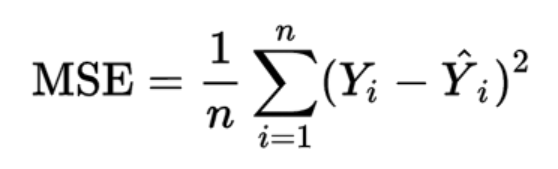
</div>

Y is the actual value and Y_hat is the prediction , we only care about how much the prediction varies from the target. Not in which direction. So, we square the difference and divide the entire sum by the total number of records.

### Note:

**In the Regression Tree algorithm, we do the same thing as the Classification trees. But, we try to reduce the Mean Square Error at each child rather than the entropy.**

What is bias?
Bias is the differene between actual and the predicted values.

underfit:
model hasnt captured relevant patterns from training data and therfore doesnt give correct results on test data. this probelm is known as underfit
undefitting occurs when bias is high

variance:gives how data is spread.
due to high variance
when model tries to cover all points it learns from noise also.this performs very well in training.
but it doesnt work with new test data

overfitting:
model performed well in training but failed on new test data.this situation is called overfitting.
overfitting occurs due to high variance and low bias
(model has learnt unnecessary things from noise)

undefitting:when model has not learnt pattern in training data well and is unable to generalize well on new/test data
underfitting occurs due to high bias and low variance

disadvantage of decision tree is overfitting
by preponing/postproning we can control overfitting

inplace of information gain in decision tree we use variance reduction in regression tree.
based on high variance reduction it splits tree nodes.
variance reduction VR=var(Root)-summation(weight of each split * var(child))

based on VR for different splits it selects the highest one as the split

imbalanced means label classes  are not in equal proportions

## Demo 5.1: Decision Tree Regressor

### Import libraries

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler,LabelEncoder
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.simplefilter(action='ignore')

### Loading Data

In [95]:
df = pd.read_csv("DS2_C5_S5_BikeSharing_Data_Concept.csv")


### 1. Data Exploration

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [97]:
df['cnt'].nunique()

869

In [98]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### 2. Preprocessing

In [99]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [100]:
#if u want to convert date kind of object to date type use this
df["dteday"]=pd.to_datetime(df["dteday"])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [101]:
df[df.isnull().any(axis=1)]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [102]:
type(df.values.ravel())

numpy.ndarray

In [103]:
type(df.values)

numpy.ndarray

In [104]:
df.values.shape

(17379, 17)

In [105]:
#puts all values into a single array
df.values.ravel().shape

(295443,)

<AxesSubplot:>

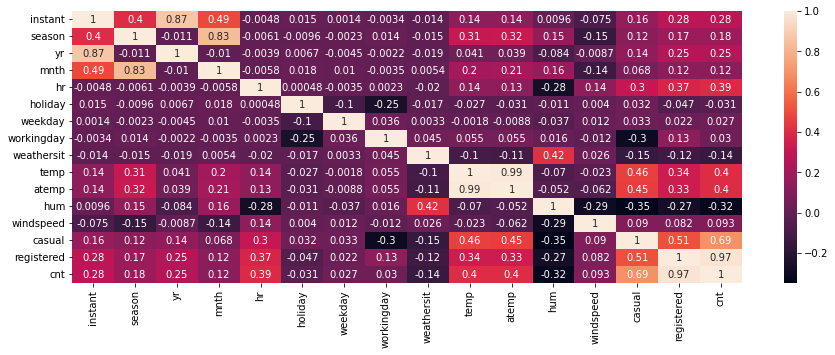

In [106]:
plt.figure(figsize=(15,5))
sb.heatmap(df.corr(),annot=True)

### 3. Data Preparation - Feature Engineering

In [107]:
df.drop("dteday",axis=1,inplace=True)


In [108]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

### 4. Modeling

In [110]:
model=DecisionTreeRegressor(max_depth=3,min_samples_split=5,min_samples_leaf=10).fit(x_train,y_train)
model.score(x_train,y_train)

0.9436940839208228

In [111]:
model.score(x_test,y_test)

0.9395435549421822

### 5. Visualization

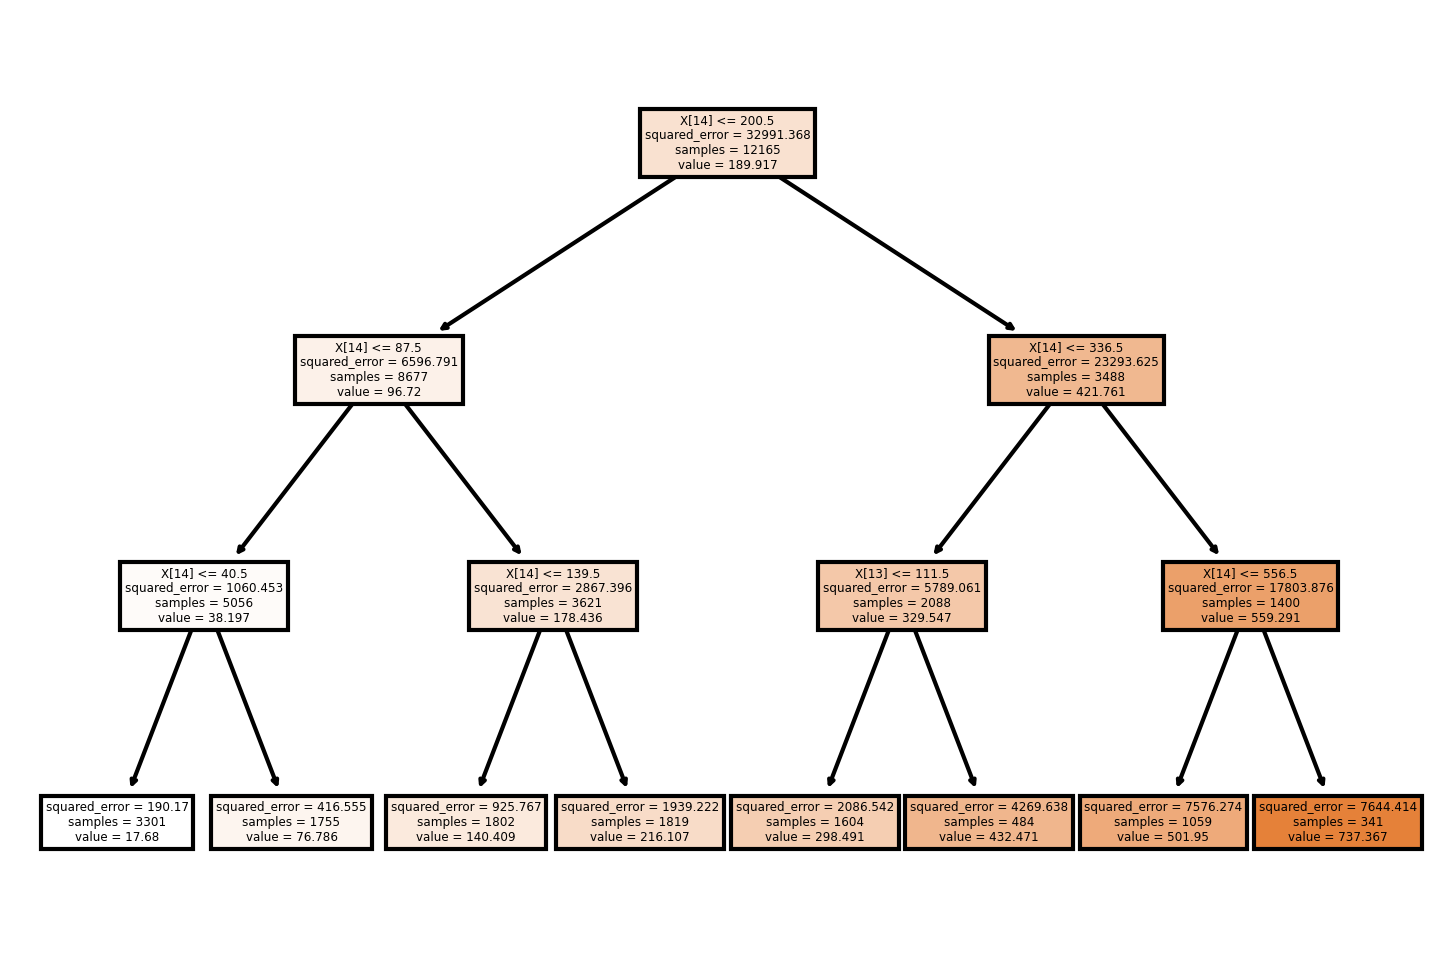

In [112]:
fig,ax=plt.subplots(dpi=300)
tree.plot_tree(model,filled=True)
plt.show()

## What is Cross-Validation?

### Intuition
Training a model on the same data means that the model will eventually learn well for only that data and fail on new data, this is called **overfitting**. This is where cross-validation comes into the picture. 

**Cross-Validation** in machine learning is a technique that is used to train and evaluate our model on a portion of our database, before re-portioning our dataset and evaluating it on the new portions.

This means that instead of splitting our dataset into two parts, one to train on and another to test on, we split our dataset into multiple portions, train on some of these and use the rest to test on. We then use a different portion to train and test our model on. This ensures that our model is training and testing on new data at every new step.

Consider the block below in the Figure to represent the entirety of our data. We partition the dataset into training and testing data. The training data will be used by our model to learn. The testing dataset will be used by our model to predict unseen data. It is used to evaluate our model’s performance. The following Figure shows the plotting of training and testing data.

<div>
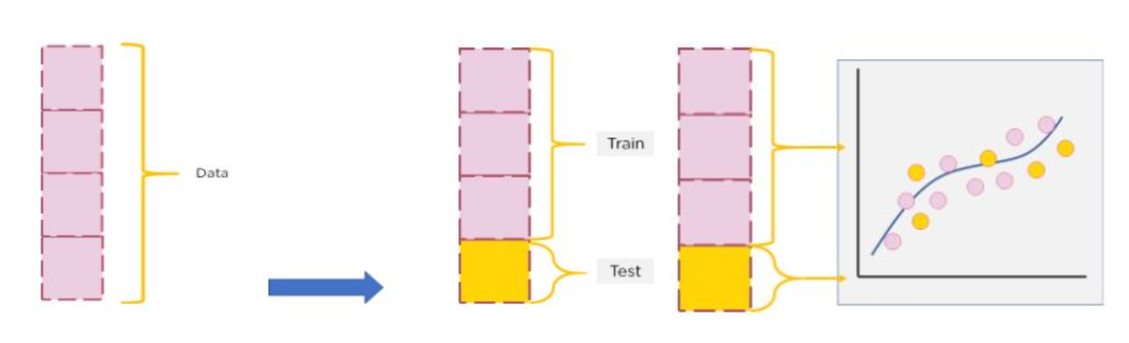
</div>

We then choose a different portion to test on and use the other portions for training as shown below. Then, the model performance is re-evaluated with the results obtained from the new portioned dataset to get better results.
<br><br>

<div>
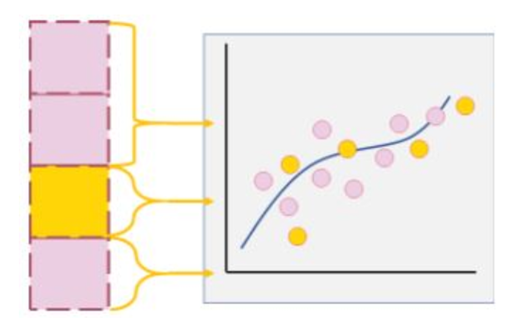
</div>

### Steps in Cross-Validation

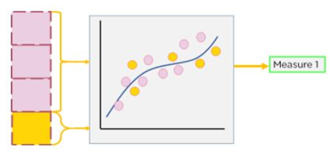
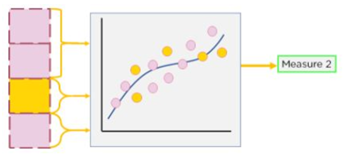
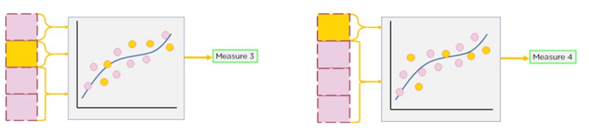

### Types of Cross Validation

<div>
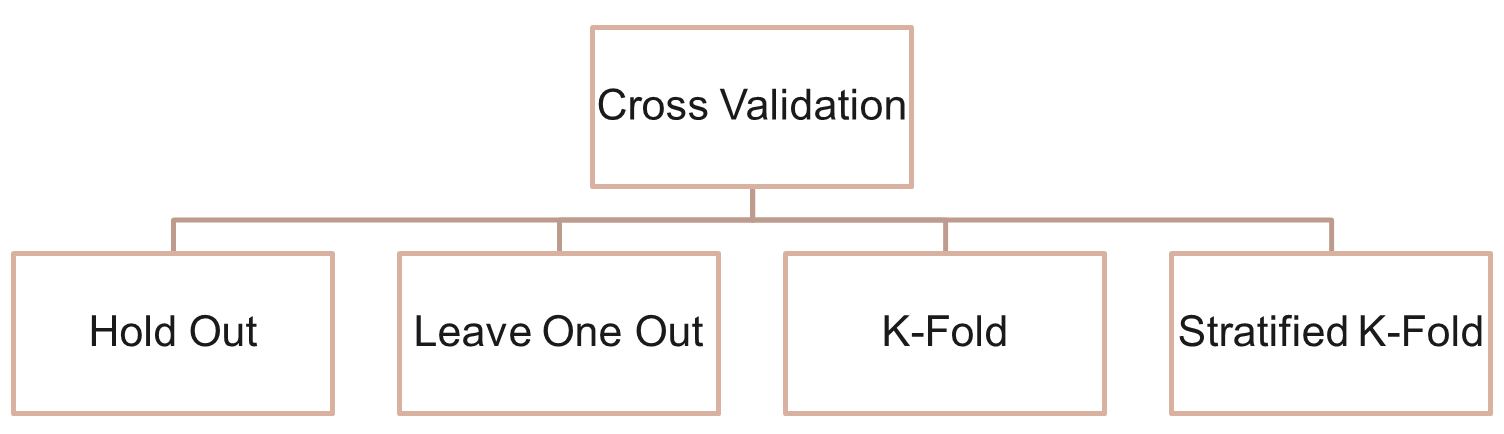
</div>

In [113]:
#Cross-validation is a technique for evaluating ML models by training several ML models on subsets of 
#the available input data and evaluating them on the complementary subset of the data.
#Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

## Demo 5.2: Cross Validation

In [114]:
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold,StratifiedKFold

### Hold Out Method

In [115]:
X = [9,19,29,39,49,59,69,79,89,99]
train, test= train_test_split(X,test_size=0.25, random_state=1)
print("Train:",train,"Test:" ,test)


Train: [49, 9, 39, 19, 79, 89, 59] Test: [29, 99, 69]


### Leave One Out Method

In [116]:
X = [9,19,29,39,49,59,69,79,89,99]
LOO = LeaveOneOut()
for train, test in LOO.split(X):
    print("%s %s"% (train,test))


[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In LOOCV (Leave one out cross-validation), instead of leaving out a portion of the dataset as testing data, we select one data point as the test data. The rest of the dataset will be used for training and the single data point will be used to predict after training. 

The final performance measure will be the average of the measures for all n iterations.

### K-Fold Method

In [117]:
X = [9,19,29,39,49,59,69,79,89,99]
kf = KFold(n_splits=3, shuffle=False, random_state=None)
for train, test in kf.split(X):
    print("Train data",train,"Test data",test)


Train data [4 5 6 7 8 9] Test data [0 1 2 3]
Train data [0 1 2 3 7 8 9] Test data [4 5 6]
Train data [0 1 2 3 4 5 6] Test data [7 8 9]


In K-fold cross-validation, K refers to the number of portions the dataset is divided into. K is selected based on the size of the dataset.

The final performance measure will be the average of the output measures of the K iterations

### Stratified K-Fold Method

This method is useful when there are minority classes present in our data. In some cases, while partitioning the data, some testing sets will include instances of minority classes while others will not. 

When this happens, our accuracy will not properly reflect how well minority classes are being predicted. To overcome this, The data is split so that each portion has the same percentage of all the different classes that exist in the dataset. 

**Note**<br>
In normal cross-validation, the data is divided without keeping in mind the distribution of individual classes. The model, thus cannot properly predict for minority classes.

Stratified K-folds overcomes this by maintaining the same percentage of data classes in all the folds, the model can be trained even on minority classes

In [118]:
X = np.array([[9,19],[29,39],[49,59],[69,79],[89,99],[109,119]])
y= np.array([0,0,1,0,1,1])
skf = StratifiedKFold(n_splits=3,random_state=None,shuffle=False)
for train_index,test_index in skf.split(X,y):
    print("Train:",train_index,'Test:',test_index)
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]


Train: [1 3 4 5] Test: [0 2]
Train: [0 2 3 5] Test: [1 4]
Train: [0 1 2 4] Test: [3 5]


In [119]:
#crossvalidation technique is used for hyper parameter tuning,comparing different models from different algos

## Demo 5.3: Find Optimum Depth Level of Regressor Tree Using Stratified K-Fold Cross Validation method

In [120]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1


Fold:1, Train set: 4, Test set:2
Fold:2, Train set: 4, Test set:2
Fold:3, Train set: 4, Test set:2


In [121]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [122]:
 # We will try with max depth starting from 1 to 15 and depending on the final ‘rmse’ score choose the value of max_depth.
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import tree
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf,scoring="neg_mean_squared_error")
    print(f'For max depth:,{val}')
    rmse(score.mean())

For max depth:,1
rmse= 0.59
For max depth:,2
rmse= 0.61
For max depth:,3
rmse= 0.58
For max depth:,4
rmse= 0.58
For max depth:,5
rmse= 0.58
For max depth:,6
rmse= 0.58
For max depth:,7
rmse= 0.58
For max depth:,8
rmse= 0.58
For max depth:,9
rmse= 0.58
For max depth:,10
rmse= 0.58
For max depth:,11
rmse= 0.58
For max depth:,12
rmse= 0.58
For max depth:,13
rmse= 0.58
For max depth:,14
rmse= 0.58
For max depth:,15
rmse= 0.58
